## Observations and Insights 

In [71]:
# Dependencies and Setup
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

In [2]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

# Display the data table for preview

df = pd.merge(study_results,mouse_metadata, how="left", on="Mouse ID")
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.

len(df["Mouse ID"].unique())

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mouse_ID = df.loc[df.duplicated(subset=["Mouse ID" , "Timepoint"]), "Mouse ID"].unique()
duplicate_mouse_ID

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = df.loc[df["Mouse ID"]=="g989"]
duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = df.drop(duplicate_mouse_data.index)
cleaned_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [7]:
# Checking the number of mice in the clean DataFrame.

number_mice = len(cleaned_data["Mouse ID"].unique())
number_mice

248

In [8]:
group_df = cleaned_data.set_index('Drug Regimen').groupby(['Drug Regimen'])
group_df

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

mean = cleaned_data.groupby("Drug Regimen").mean()['Tumor Volume (mm3)']
median = cleaned_data.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
variance = cleaned_data.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
std = cleaned_data.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
sem = cleaned_data.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

tumor_summary = pd.DataFrame({
    "Mean Tumor Volume": mean,
    "Median Tumor Volume": median,
    "Tumor Volume Variance": variance,
    "Tumor Volume Std. Dev.": std,
    "Tumor Volume Std. Err.": sem,
})
tumor_summary.head()

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
summary_table = group_df.agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})
summary_table.head()

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466

## Bar and Pie Charts

In [38]:
# Bar Chart using pyplot.plot()
#Drug Regime
drug_group = cleaned_data.groupby('Drug Regimen')

# Count how many times each maker appears in our group
count_mice = drug_group['Drug Regimen'].count()
count_mice

mice_count_times = cleaned_data["Drug Regimen"].value_counts()
mice_count_times

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

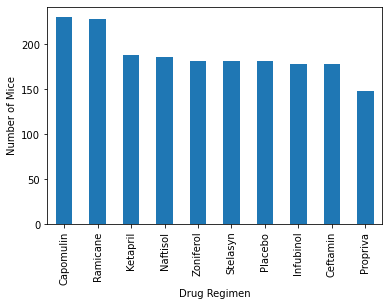

In [70]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas.
mice_count_times.plot(kind='bar')

# Set the xlabel and ylabel using class methods
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice')
plt.show()


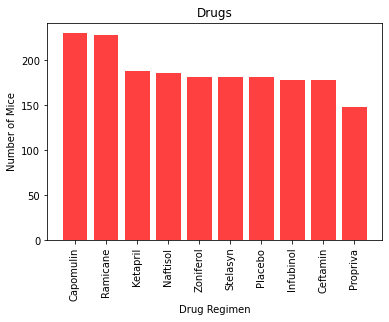

In [42]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

# drugs = drug_count
# mice = mice_count_times
# x_axis = np.arange(0, len(drugs))
# tick_locations = []
# for x in x_axis:
#     tick_locations.append(x)
# plt.xlim(-0.75, len(drugs)-.25)
# plt.ylim(0, max(mice) + 5)

plt.bar(mice_count_times.index.values, mice_count_times.values, facecolor="red", alpha=0.75, align="center")
plt.title("Drugs")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.xticks(rotation=90)
plt.show()


In [46]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
count_sex1 = cleaned_data['Sex'].value_counts()
count_sex1

Male      958
Female    922
Name: Sex, dtype: int64

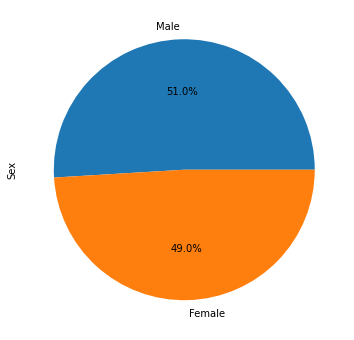

In [49]:
# Labels for the sections of our pie chart, make chart using pandas
count_sex1.plot(kind='pie', subplots=True, figsize=(11, 6), autopct='%1.1f%%')
plt.show()

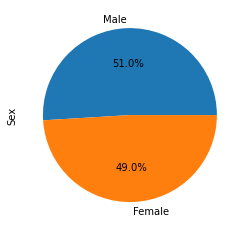

In [53]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# # labels = ["Female", "Male"]
# # The values of each section of the pie chart
# count = [922, 958]
# # The colors of each section of the pie chart
# colors = ["lightblue", "lightgreen"]
# Tells matplotlib to seperate the "Humans" section from the others
# explode = (0.1, 0)
# # Create axes which are equal so we have a perfect circle
# plt.axis("equal")
# Save an image of our chart and print the final product to the screen


plt.ylabel("Sex")
plt.pie(count_sex1.values, labels=count_sex1.index.values,autopct="%1.1f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [24]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [25]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = cleaned_data.loc[cleaned_data["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_list.append(final_tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: 1652    25.472143
1849    23.343598
Name: Tumor Volume (mm3), dtype: float64
Ramicane's potential outliers: 1814    22.050126
Name: Tumor Volume (mm3), dtype: float64
Infubinol's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


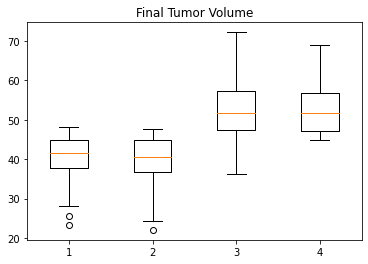

In [68]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume')
ax1.boxplot(tumor_vol_list)
plt.show()

## Line and Scatter Plots

In [54]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_mouse = cleaned_data.loc[cleaned_data["Drug Regimen"] == 'Capomulin', 'Mouse ID']
capomulin_mouse

0       b128
226     j246
227     r554
228     s185
229     b742
        ... 
1854    s710
1859    j119
1878    i557
1888    r944
1889    u364
Name: Mouse ID, Length: 230, dtype: object

In [28]:
capomulin_treatment = cleaned_data.loc[cleaned_data["Mouse ID"] == 'j246', ['Tumor Volume (mm3)', "Timepoint"]]
capomulin_treatment

,Tumor Volume (mm3),Timepoint
226,45.000000,0
451,45.641438,5
704,46.408361,10
791,43.312654,15
1020,44.020370,20
1276,44.555226,25
1354,38.044082,30
1497,38.753265,35


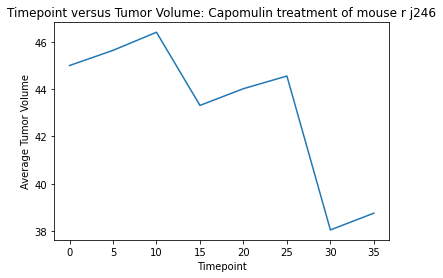

In [55]:
x_axis = capomulin_treatment["Tumor Volume (mm3)"]
y_axis = capomulin_treatment["Timepoint"]
plt.xlabel('Timepoint')
plt.ylabel('Average Tumor Volume')
plt.title("Timepoint versus Tumor Volume: Capomulin treatment of mouse r j246")

# Plot the line
plt.plot(y_axis, x_axis)
plt.show()

In [65]:
weight = cleaned_data.loc[cleaned_data["Drug Regimen"] == 'Capomulin', ['Weight (g)', "Tumor Volume (mm3)", "Mouse ID"]]
mean_1 = weight.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
weight_1 = weight.groupby("Mouse ID")["Weight (g)"].max()

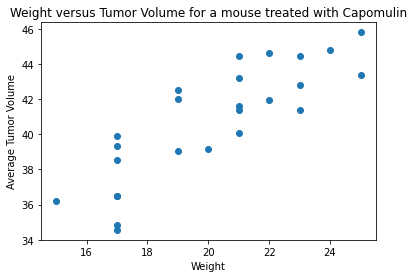

In [66]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
plt.title("Weight versus Tumor Volume for a mouse treated with Capomulin")
plt.scatter(weight_1,mean_1)
plt.xlabel('Weight')
plt.ylabel('Average Tumor Volume')
plt.show()


## Correlation and Regression

The correlation between both factors is 0.84


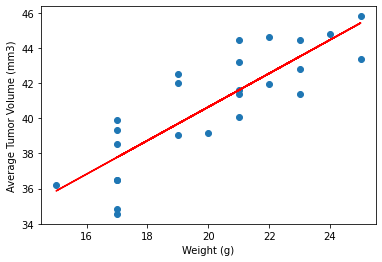

In [67]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(weight_1,mean_1)
model = st.linregress(weight_1,mean_1)
y_values = weight_1*model[0] + model[1]
plt.scatter(weight_1,mean_1)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.plot(x_values,y_values,"r-")
plt.show()